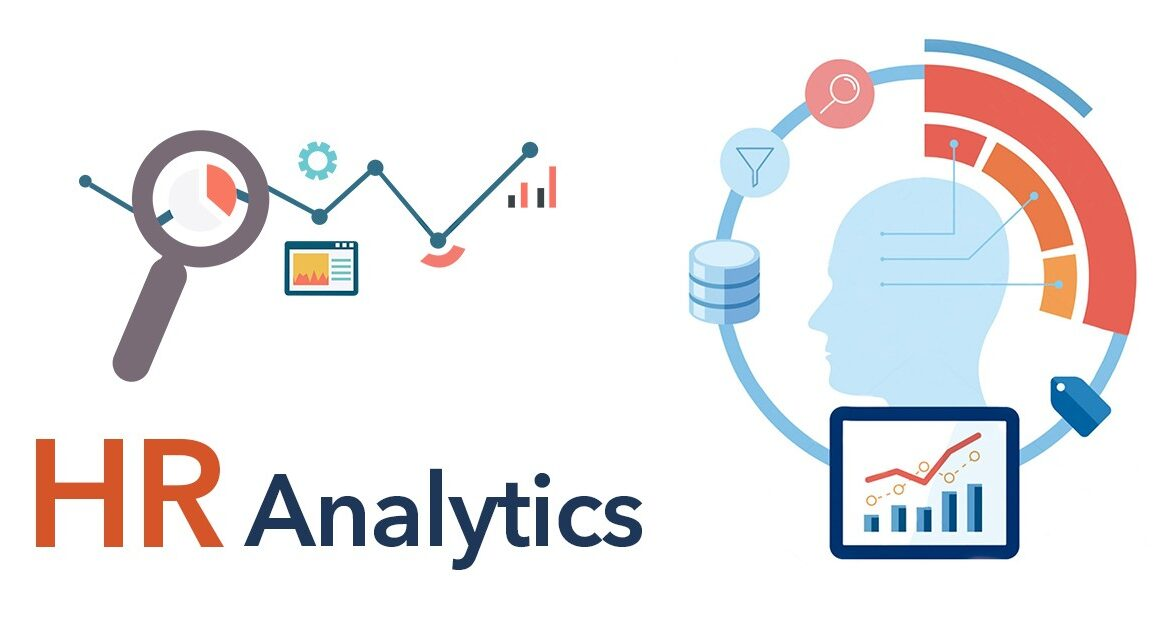

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

# Statiscal Analysis

In [9]:
df.duplicated().sum()

0

### missing value check

In [10]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                          Missing Values  %Missing data
Age                                    0            0.0
StandardHours                          0            0.0
NumCompaniesWorked                     0            0.0
Over18                                 0            0.0
OverTime                               0            0.0
PercentSalaryHike                      0            0.0
PerformanceRating                      0            0.0
RelationshipSatisfaction               0            0.0
StockOptionLevel                       0            0.0
MonthlyIncome                          0            0.0
TotalWorkingYears                      0            0.0
TrainingTimesLastYear                  0            0.0
WorkLifeBalance                        0            0.0
YearsAtCompany                         0            0.0
YearsInCurrentRole                     0            0.0
YearsSinceLastPromotion                0            0.0
MonthlyRate                            0        

## statistical Matrix

<AxesSubplot:>

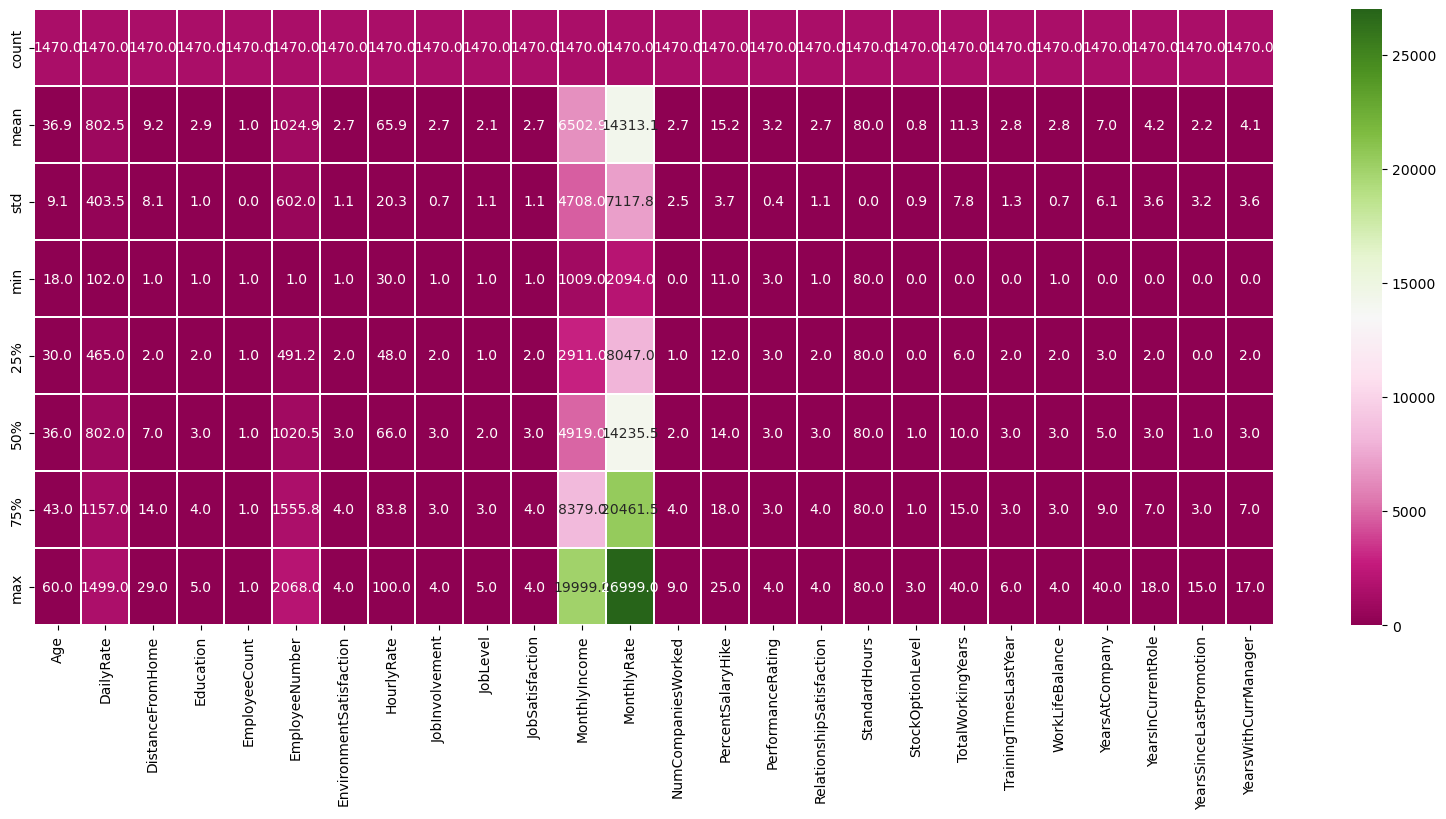

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(), linewidths = 0.1, fmt='0.1f', annot = True, cmap='PiYG')

In [13]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.722,1.093,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891,20.329,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.730,0.712,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.064,1.107,1.0,1.00,2.0,3.00,5.0


In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x23943c7e9a0>,
 [Text(-2.0112280440007817, 1.115778542106269, 'Yes'),
  Text(2.0986727415660327, -1.1642906526326284, 'No')],
 [Text(-1.1367810683482678, 0.6306574368426736, '83.88%'),
  Text(1.224225765913519, -0.6791695473690332, '16.12%')])

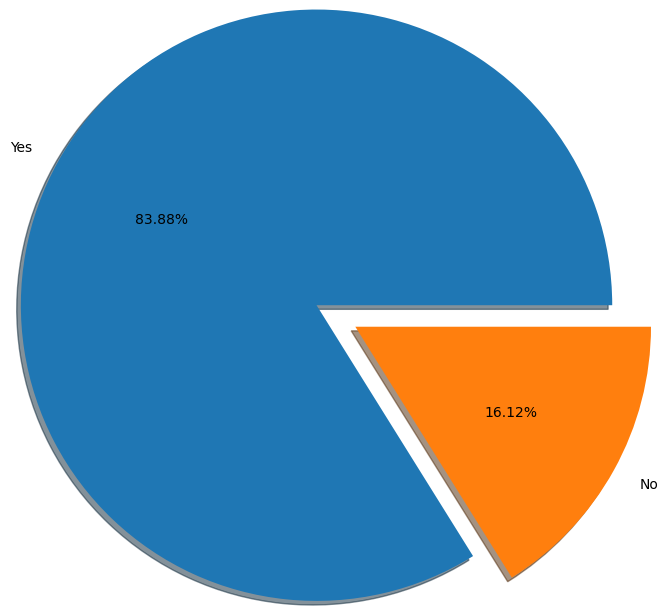

In [17]:
labels = 'Yes', 'No'
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(), labels = labels, radius= 2, autopct= '%2.2f%%', explode = [0.1,0.2], shadow= True)

## 

In [19]:
Category = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus', 'Over18','OverTime']

for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtyp

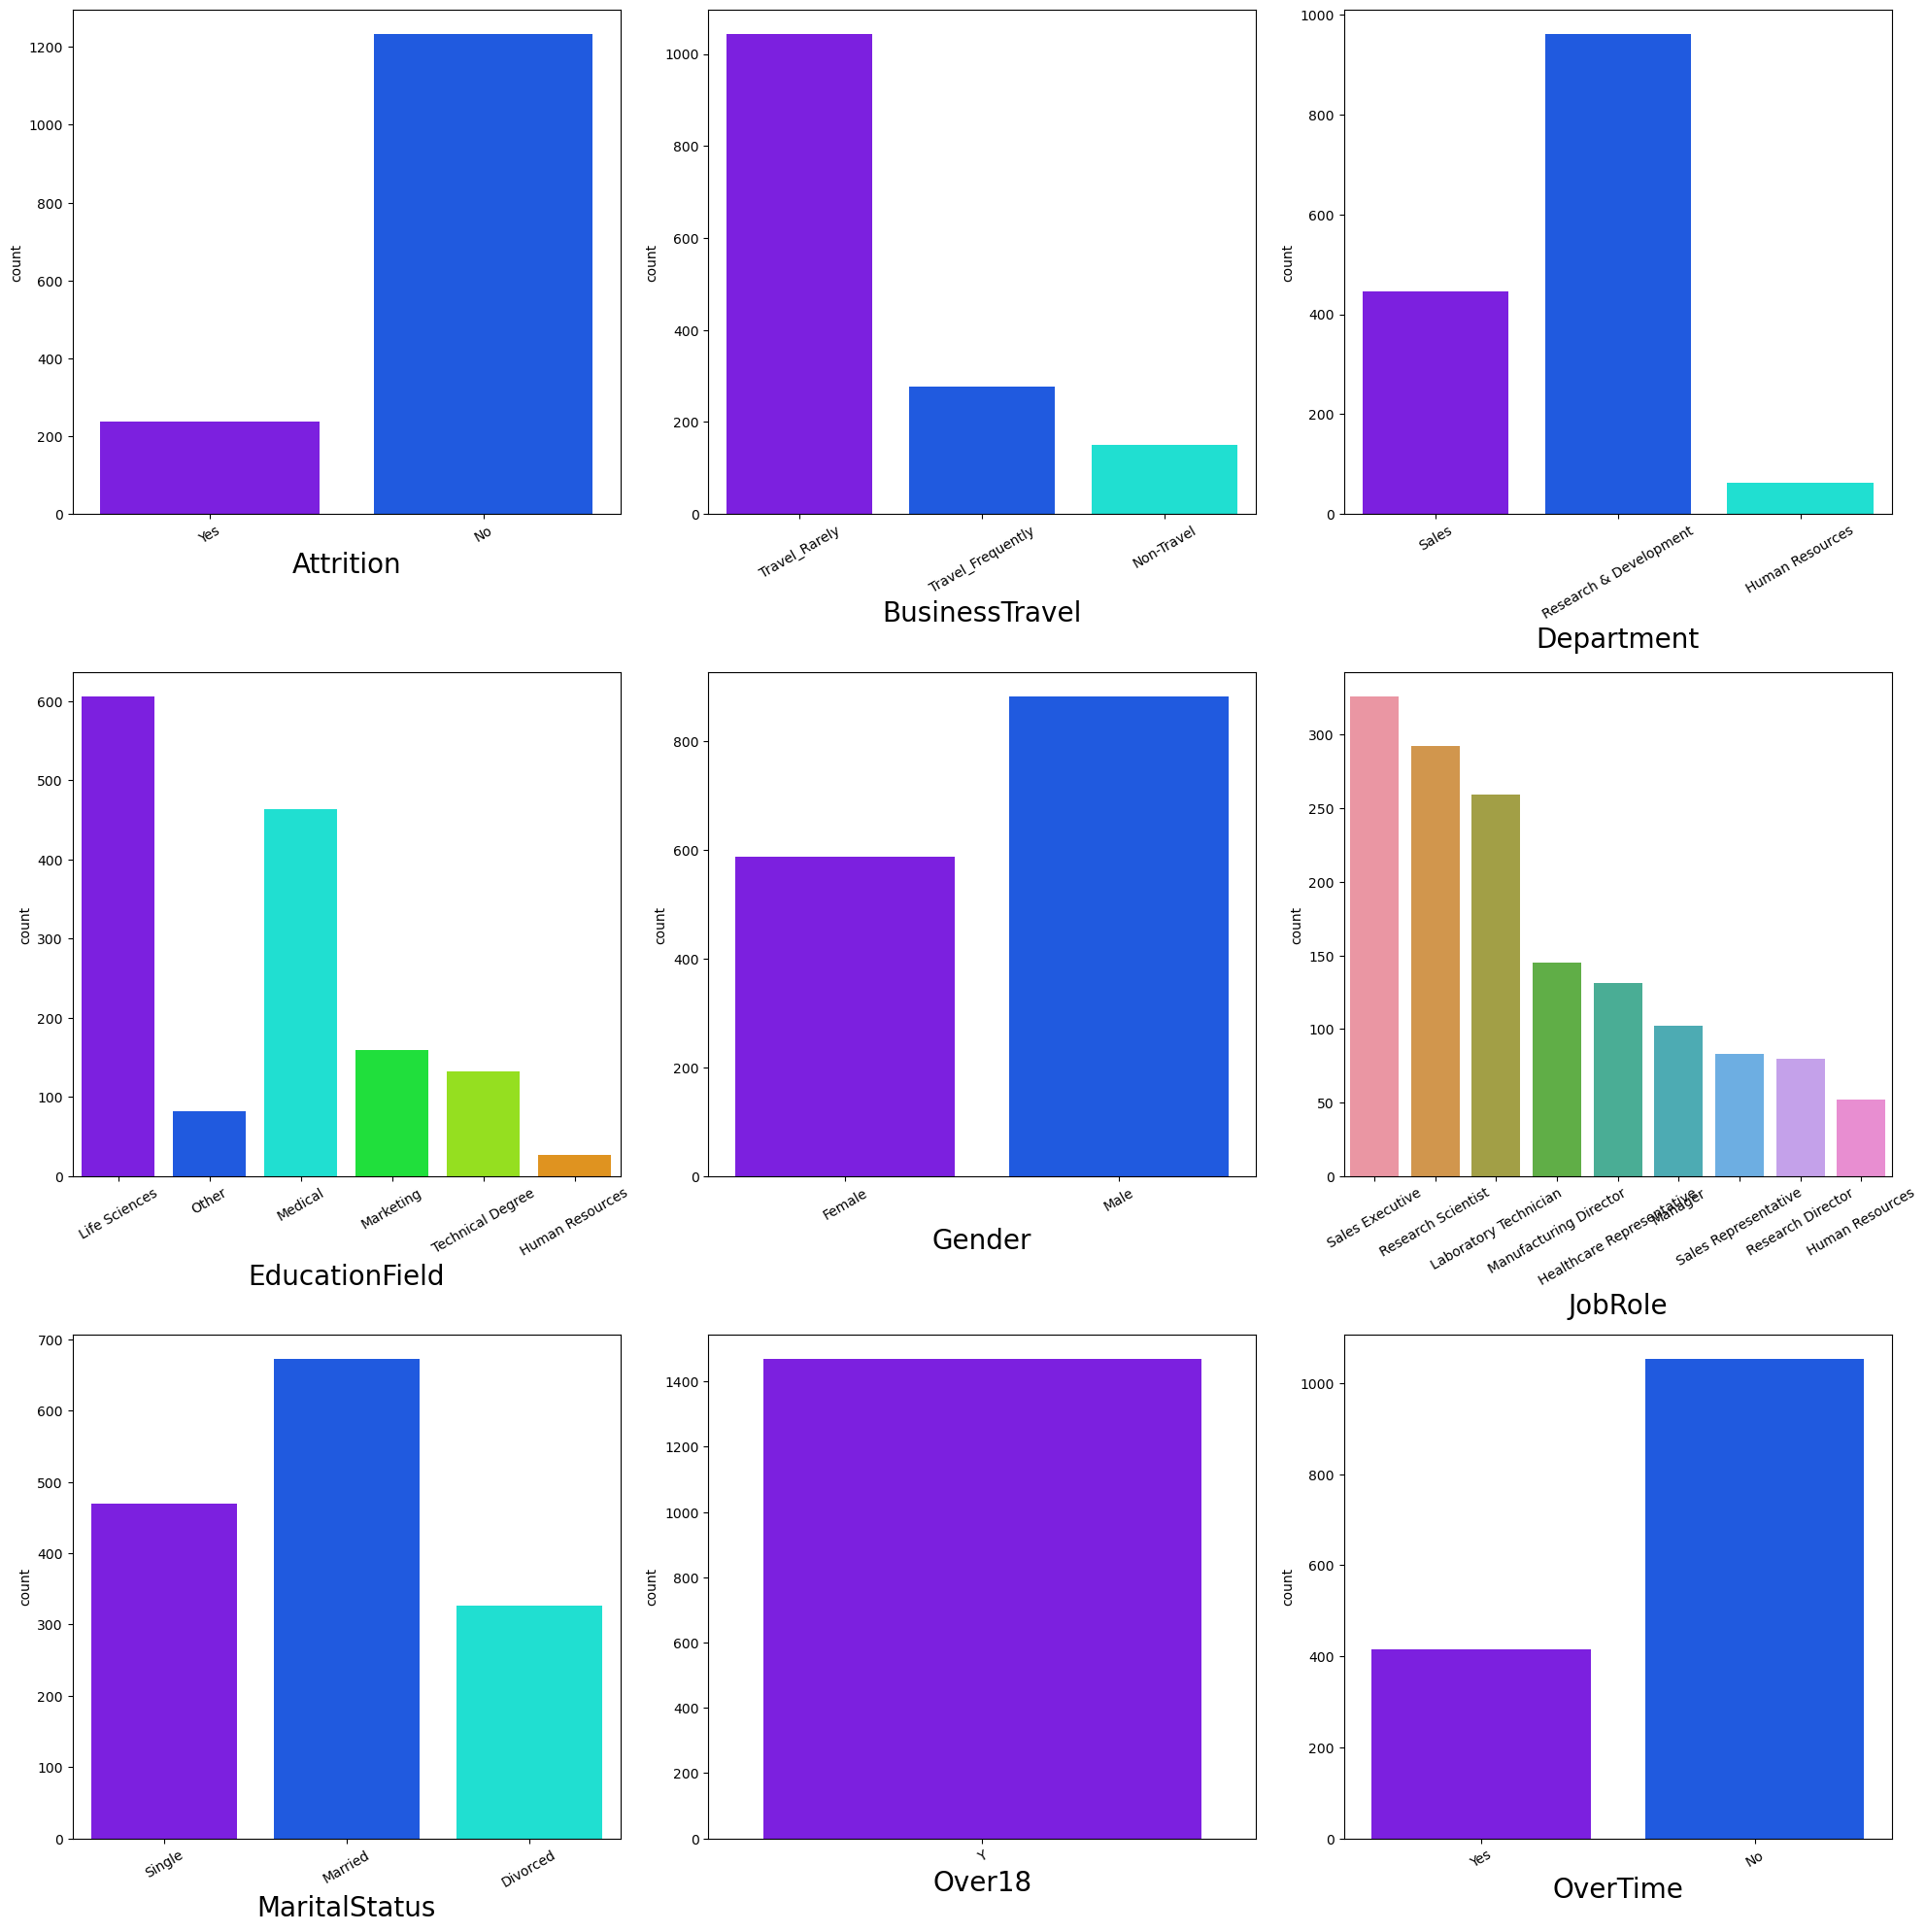

In [20]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize= (20, 20), facecolor='white')
plotnumber =1 
Category = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus', 'Over18','OverTime']

for i in Category:
    if plotnumber <=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i, fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [27]:
Ordinal = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','RelationshipSatisfaction','PerformanceRating', 'WorkLifeBalance']

for i in Ordinal:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


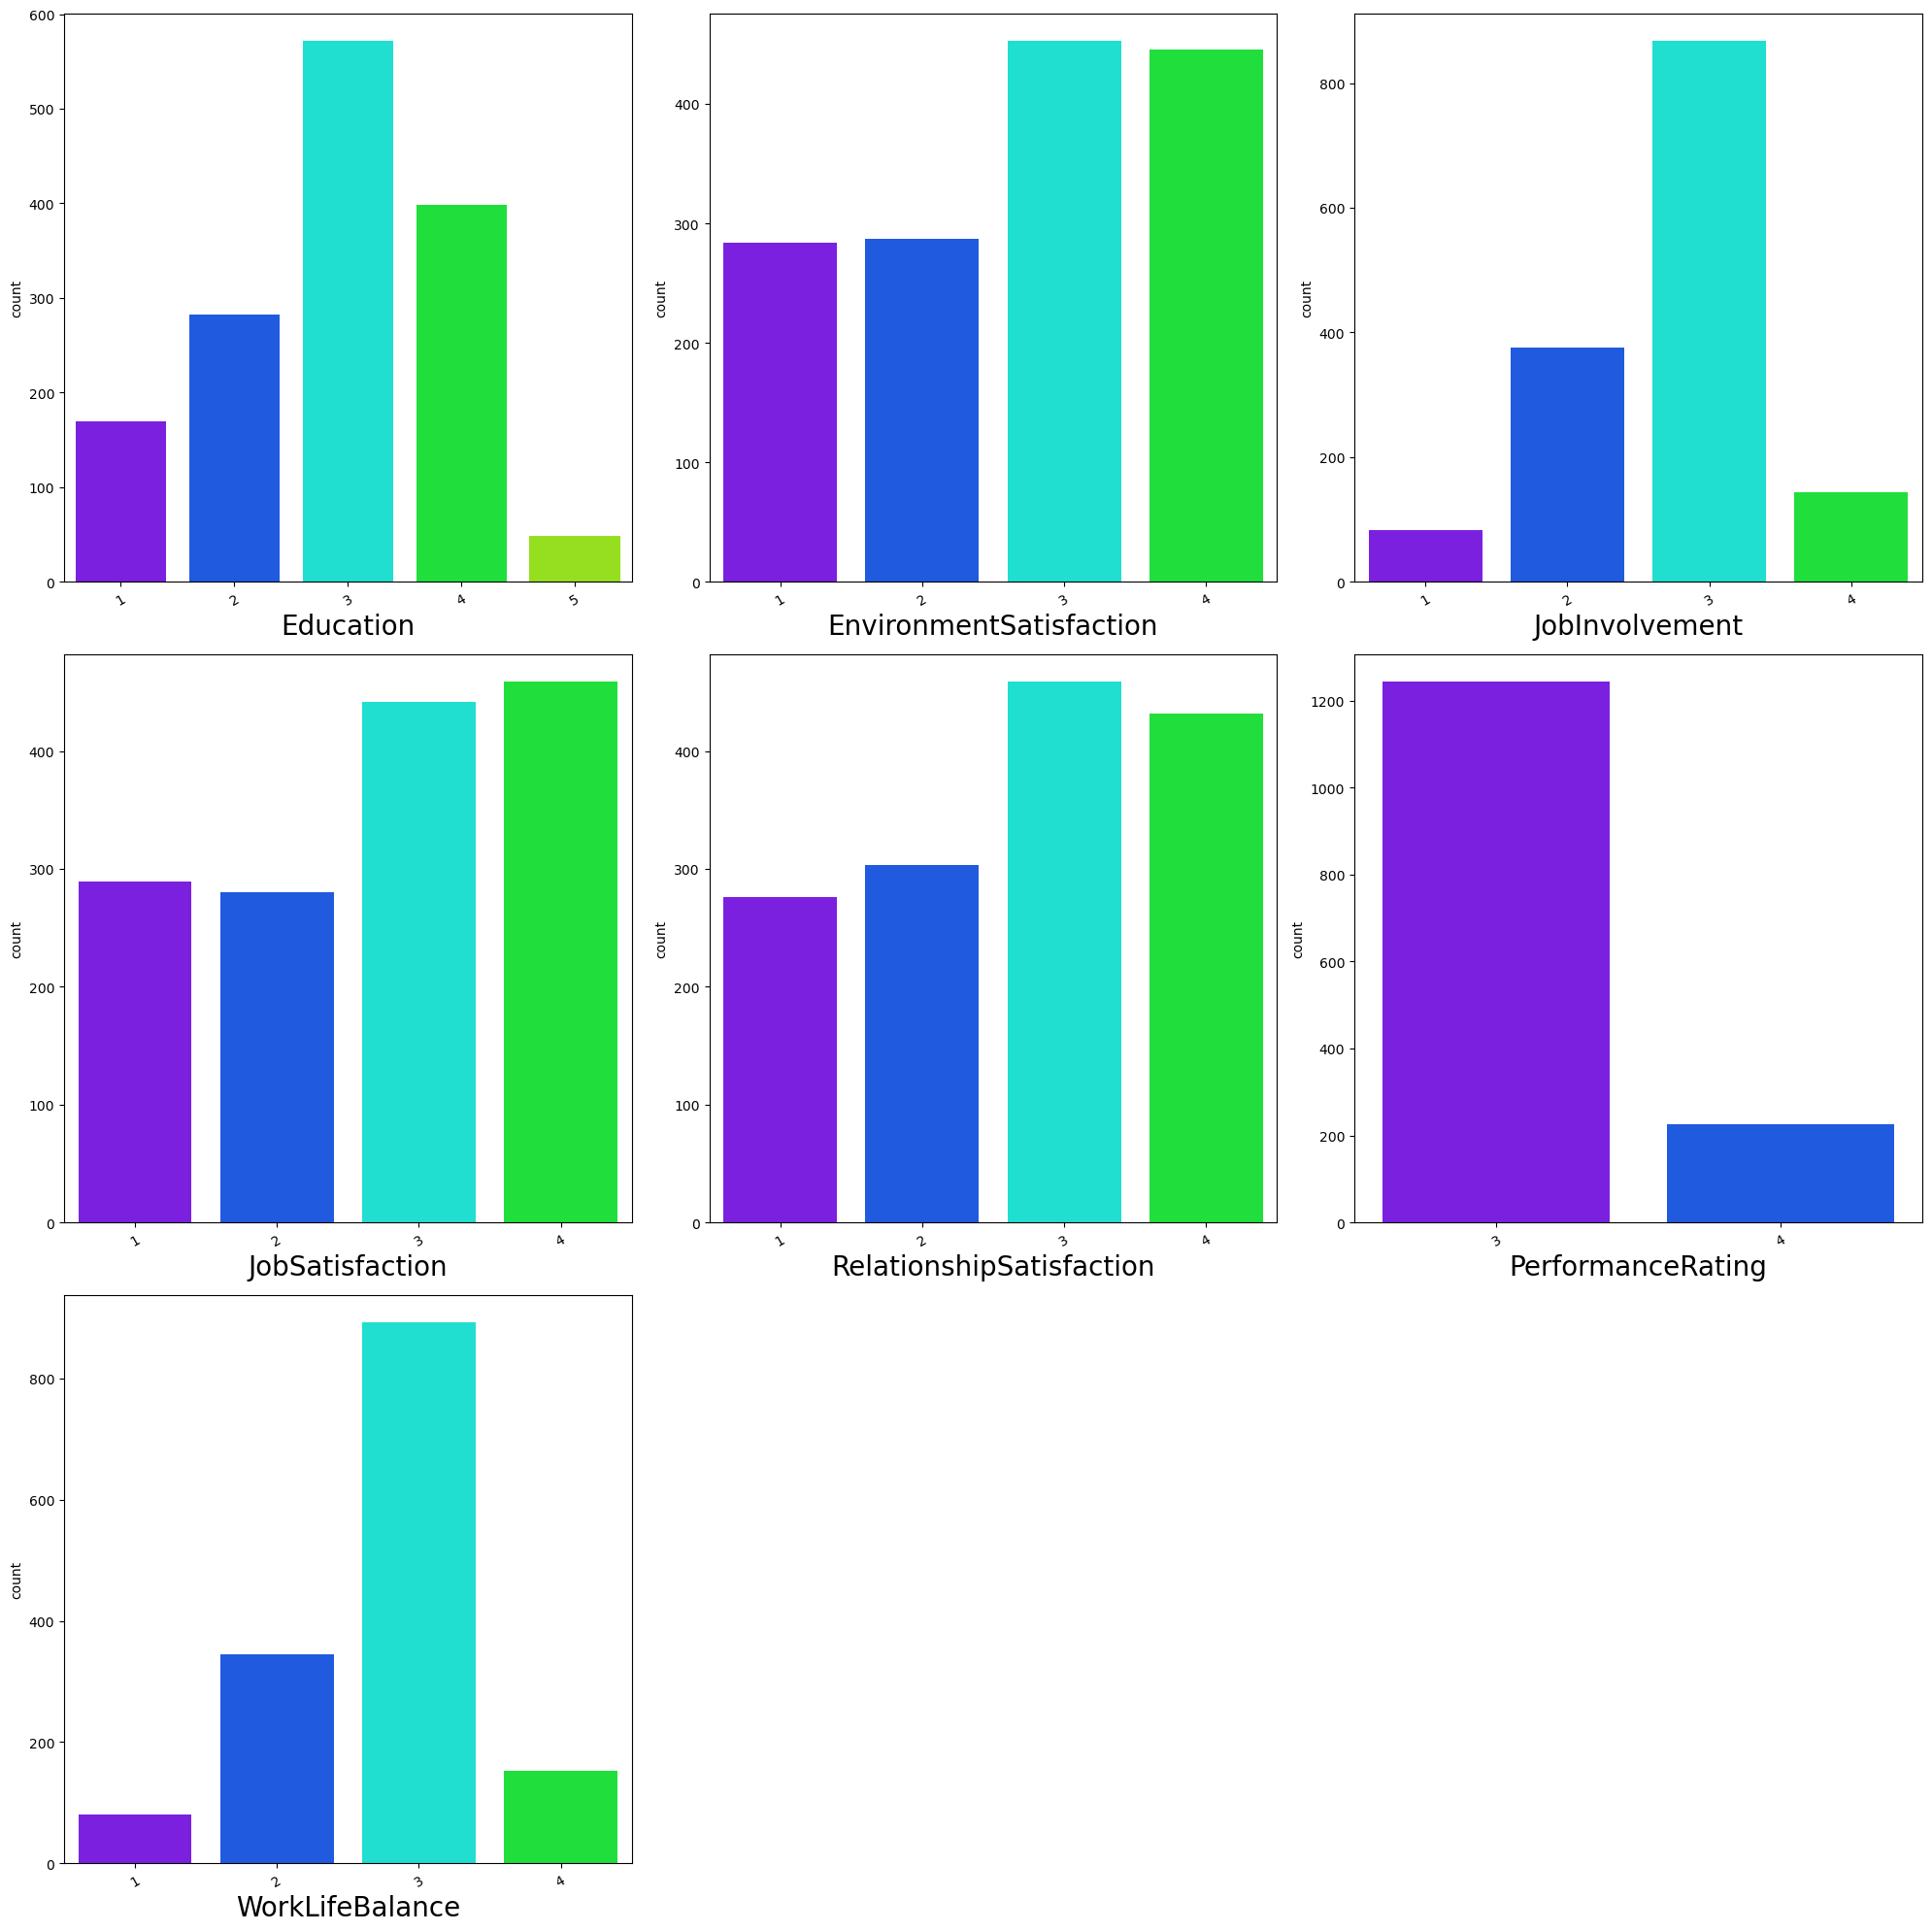

In [28]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize= (20, 20), facecolor='white')
plotnumber =1 
Ordinal = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','RelationshipSatisfaction','PerformanceRating', 'WorkLifeBalance']

for i in Ordinal:
    if plotnumber <=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i, fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

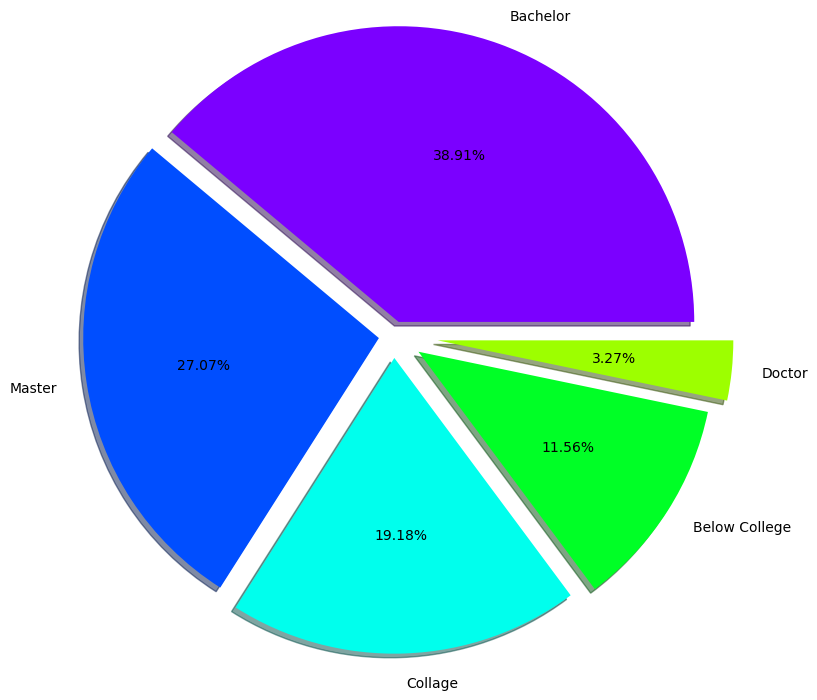

In [39]:
labels = 'Bachelor', 'Master','Collage', 'Below College', 'Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(), labels = labels, radius= 2, autopct= '%3.2f%%', explode = [0.1,0.1,0.15,0.2,0.3], shadow= True)
plt.show()

In [32]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

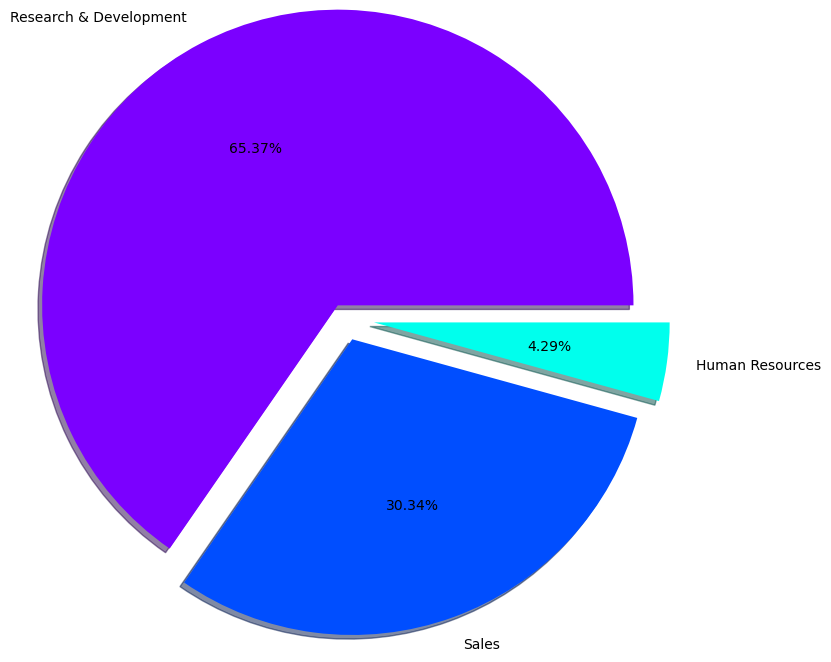

In [38]:
labels = 'Research & Development', 'Sales','Human Resources'
fig, ax = plt.subplots()
ax.pie(df['Department'].value_counts(), labels = labels, radius= 2, autopct= '%3.2f%%', explode = [0.1,0.15,0.2], shadow= True)
plt.show()

In [44]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

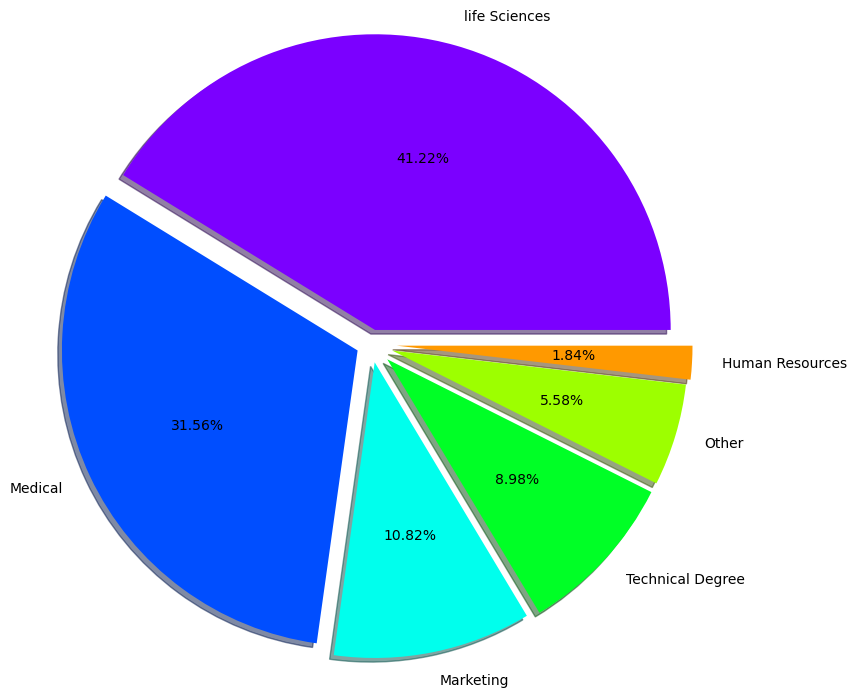

In [45]:
labels = 'life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources'
fig, ax = plt.subplots()
ax.pie(df['EducationField'].value_counts(), labels = labels, radius= 2, autopct= '%3.2f%%', explode = [0.1,0.1,0.125,0.15,0.15,0.175], shadow= True)
plt.show()

In [40]:
pd.crosstab([df.Education],[df.Department], margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


In [41]:
pd.crosstab([df.Education],[df.Department,df.Attrition], margins=True).style.background_gradient(cmap='summer_r')

# 

In [46]:
pd.crosstab([df.Education],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [47]:
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


#### Lets Work with Job Role

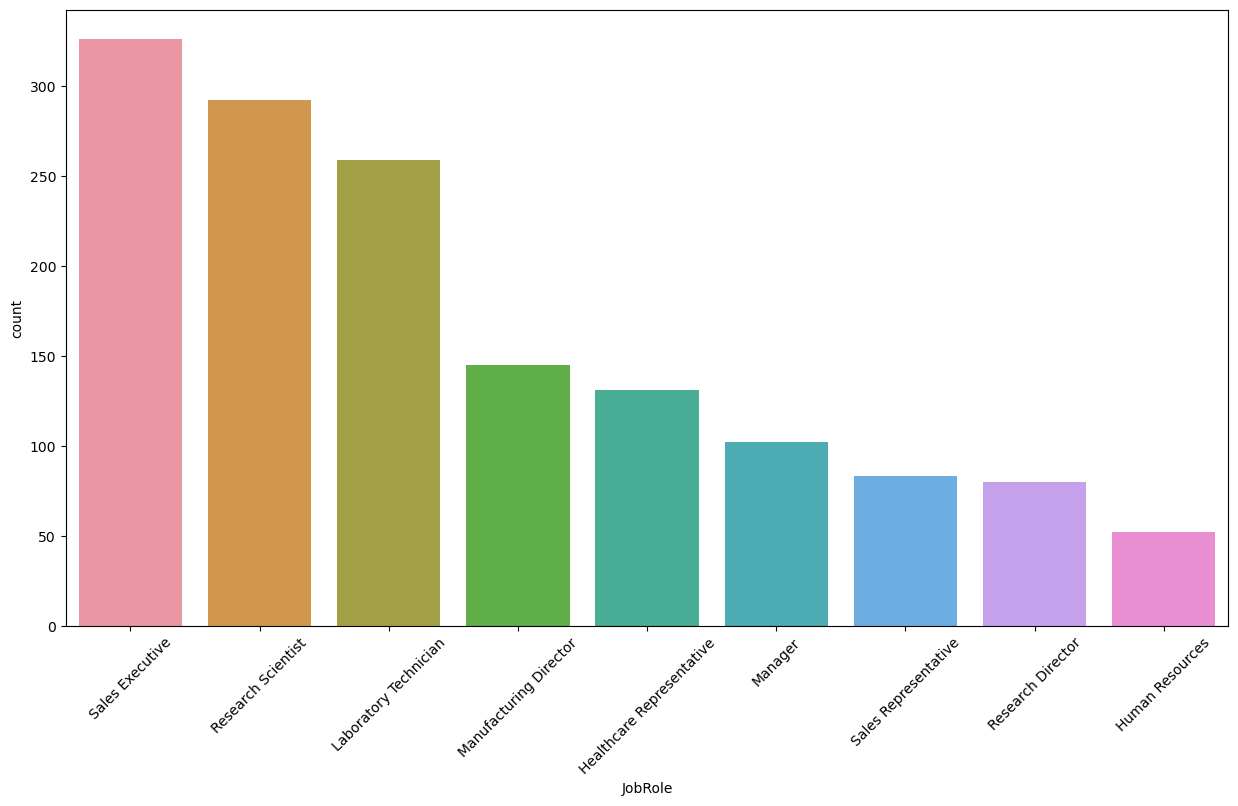

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(df['JobRole'])
plt.xticks(rotation=45)
plt.show()

In [49]:
pd.crosstab([df.JobRole],[df.Department], margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


<Figure size 1200x1000 with 0 Axes>

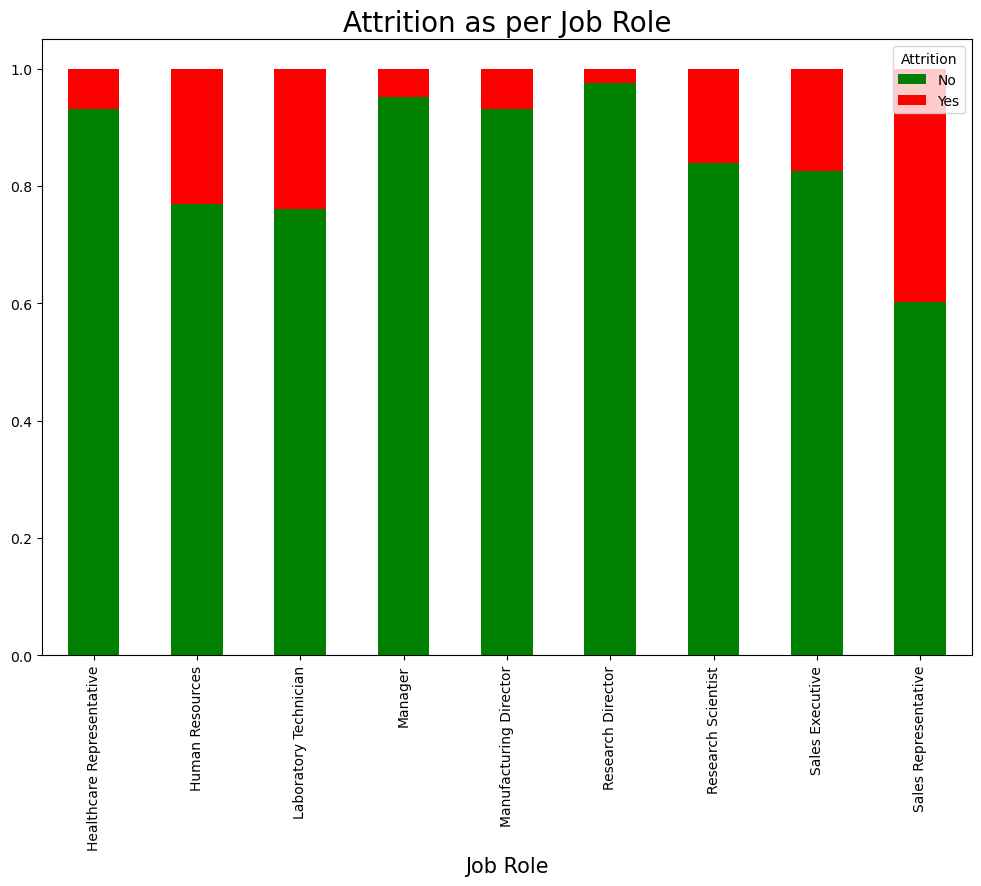

In [50]:
plt.figure(figsize=(12,10))
data= pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color= ['green', 'red'],figsize=(12,8))

plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role', fontsize=15)
plt.show()


In [51]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='summer_r')

In [54]:
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# Violinplot of Numeric Veriables

In [56]:
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

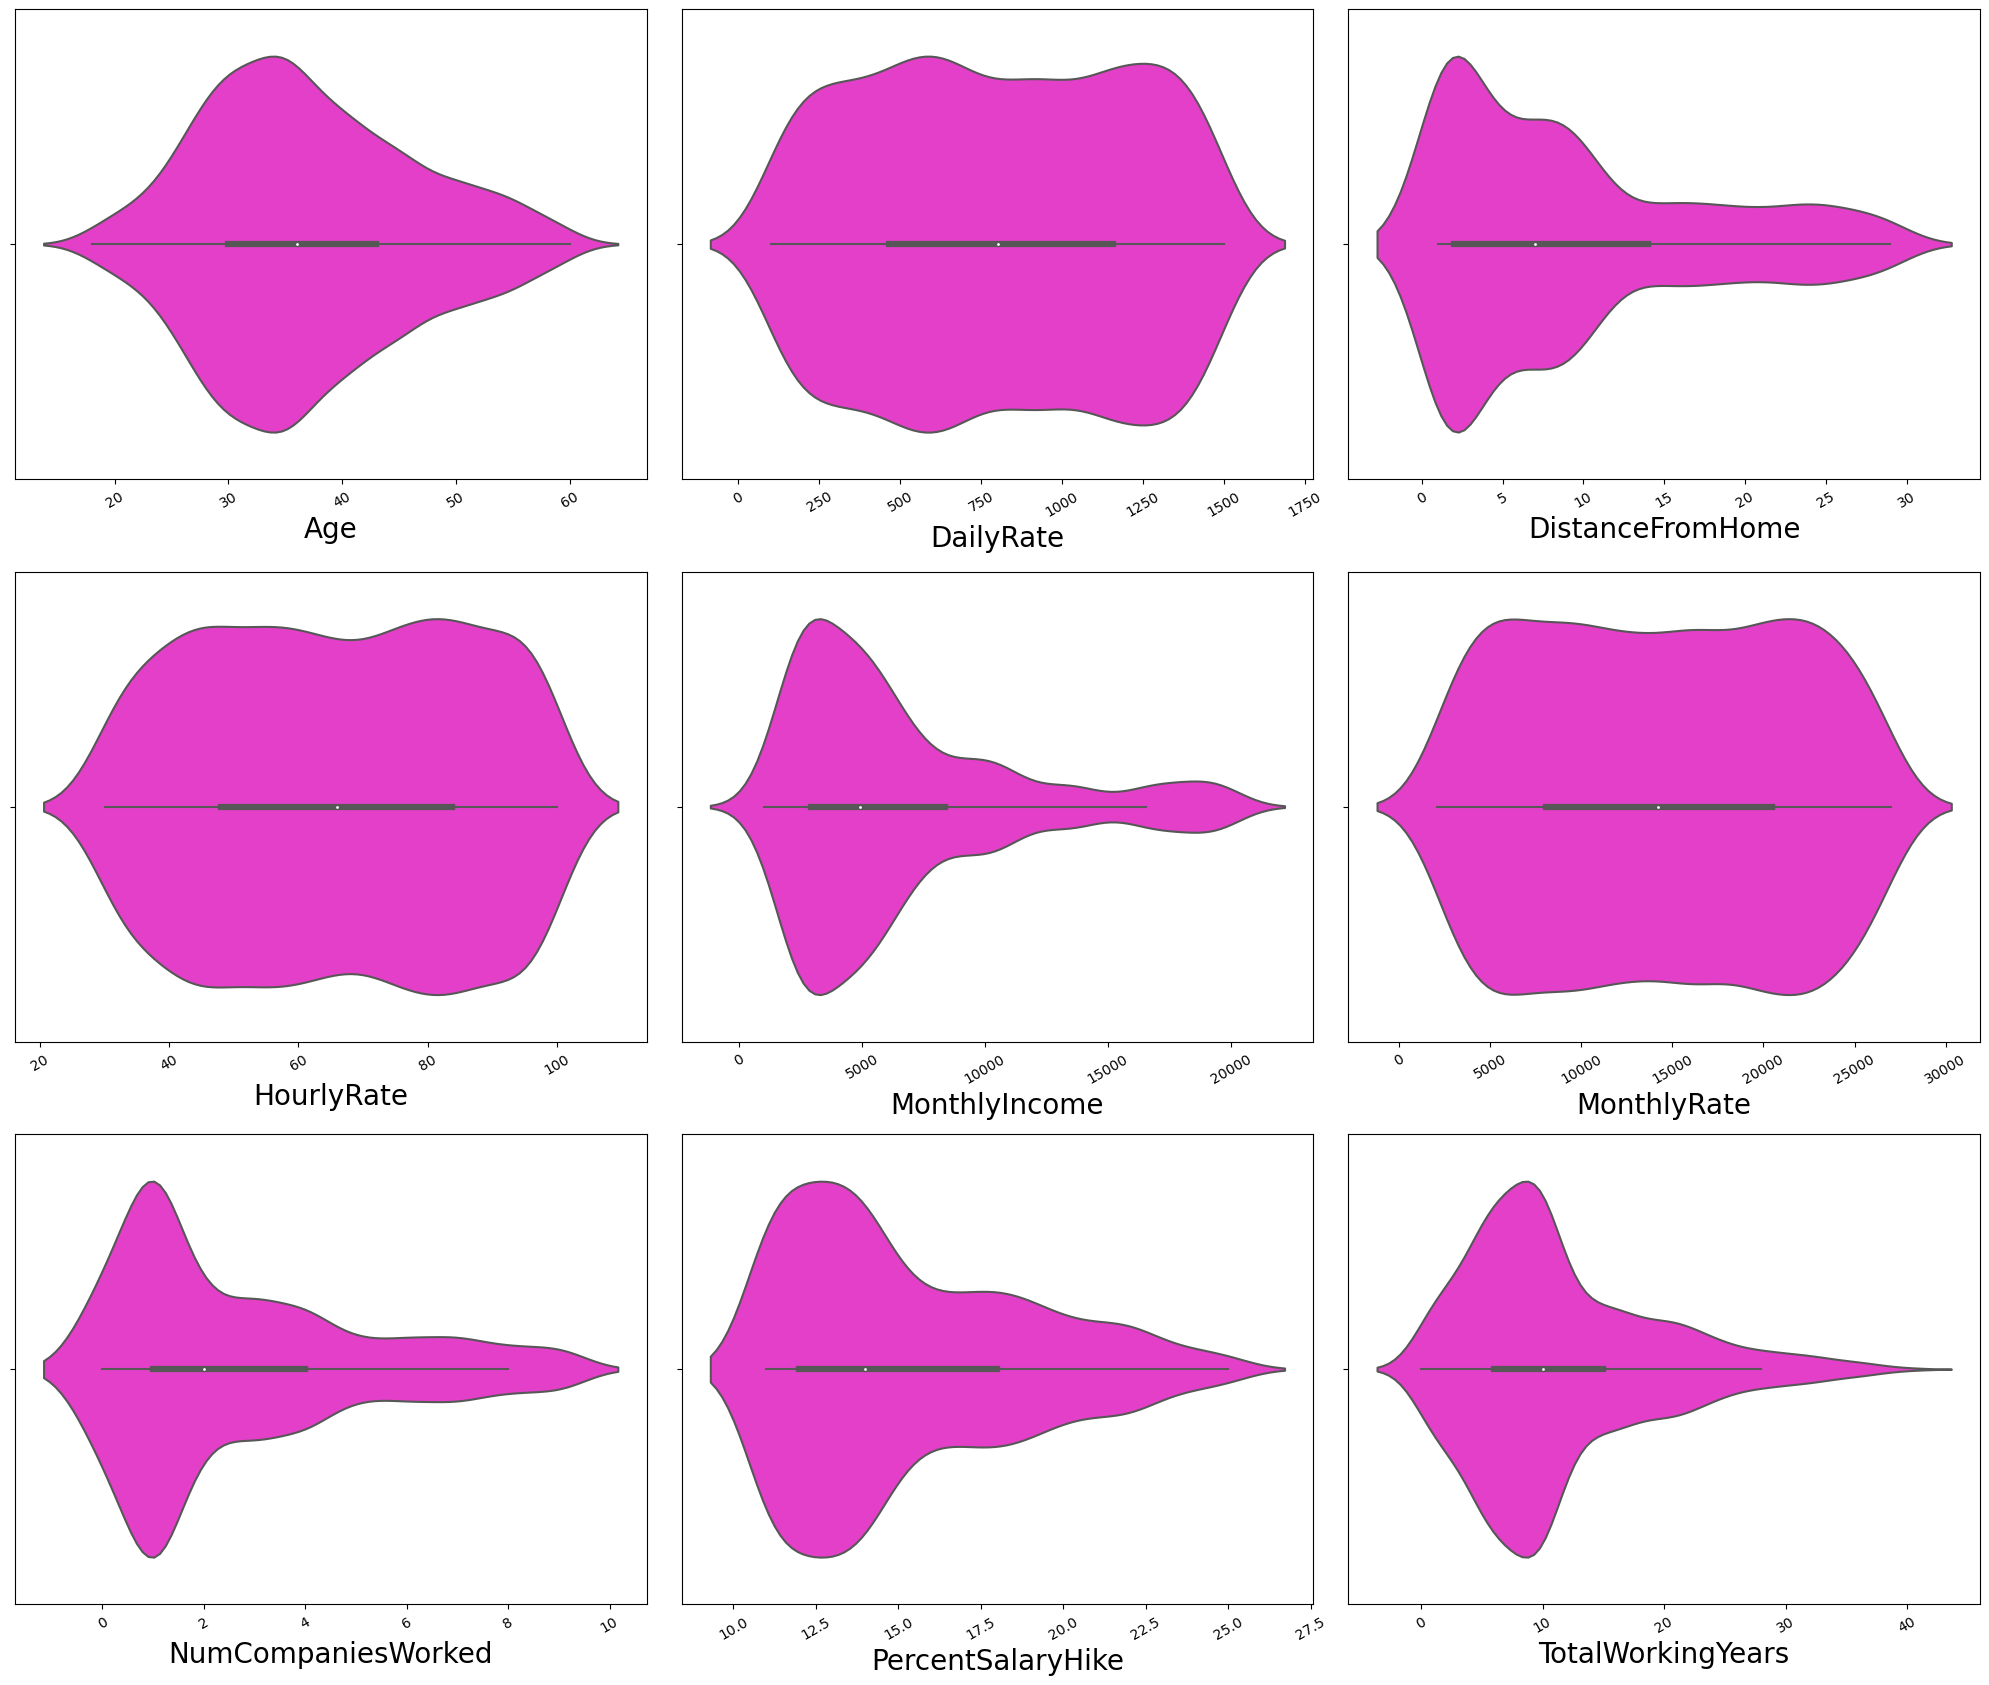

In [65]:
sns.set_palette('spring')
plt.figure(figsize= (20, 50), facecolor='white')
plotnumber =1 

for i in Numeric_int:
    if plotnumber <=9:
        ax= plt.subplot(9,3,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i, fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Age Vs Attrition 

<AxesSubplot:xlabel='Age', ylabel='count'>

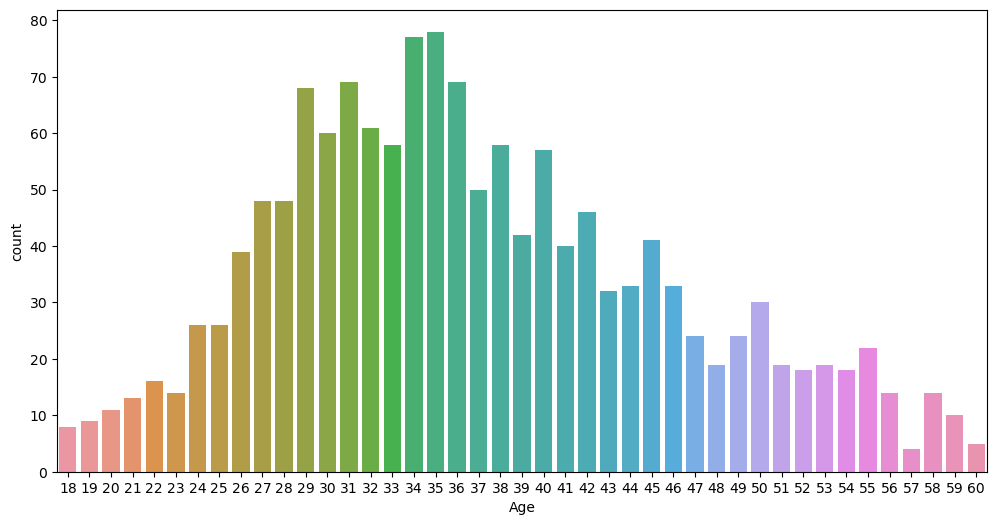

In [67]:
plt.subplots(figsize=(12,6))
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

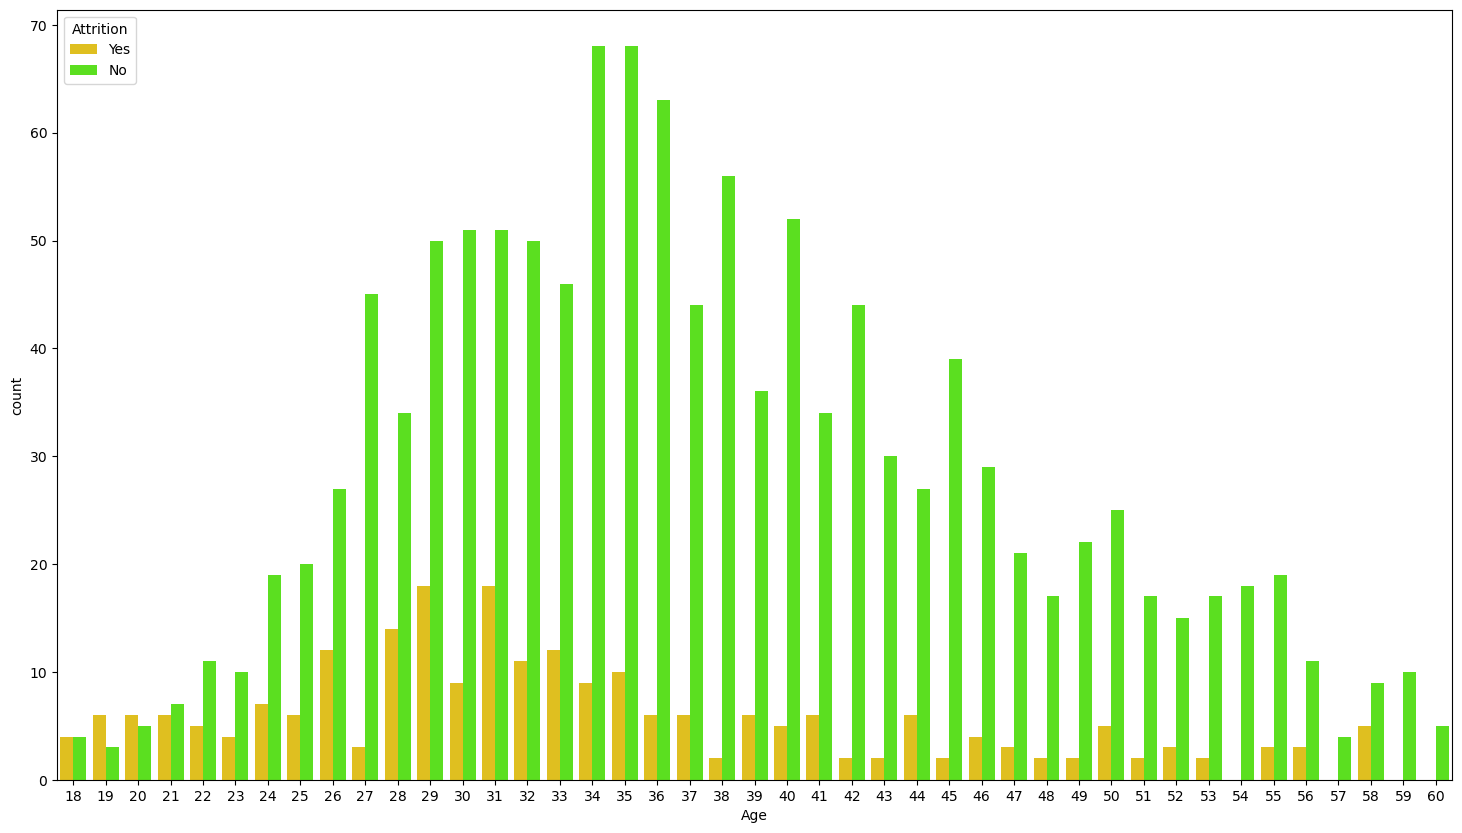

In [69]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,10))
sns.countplot(x='Age', hue= 'Attrition', data=df)

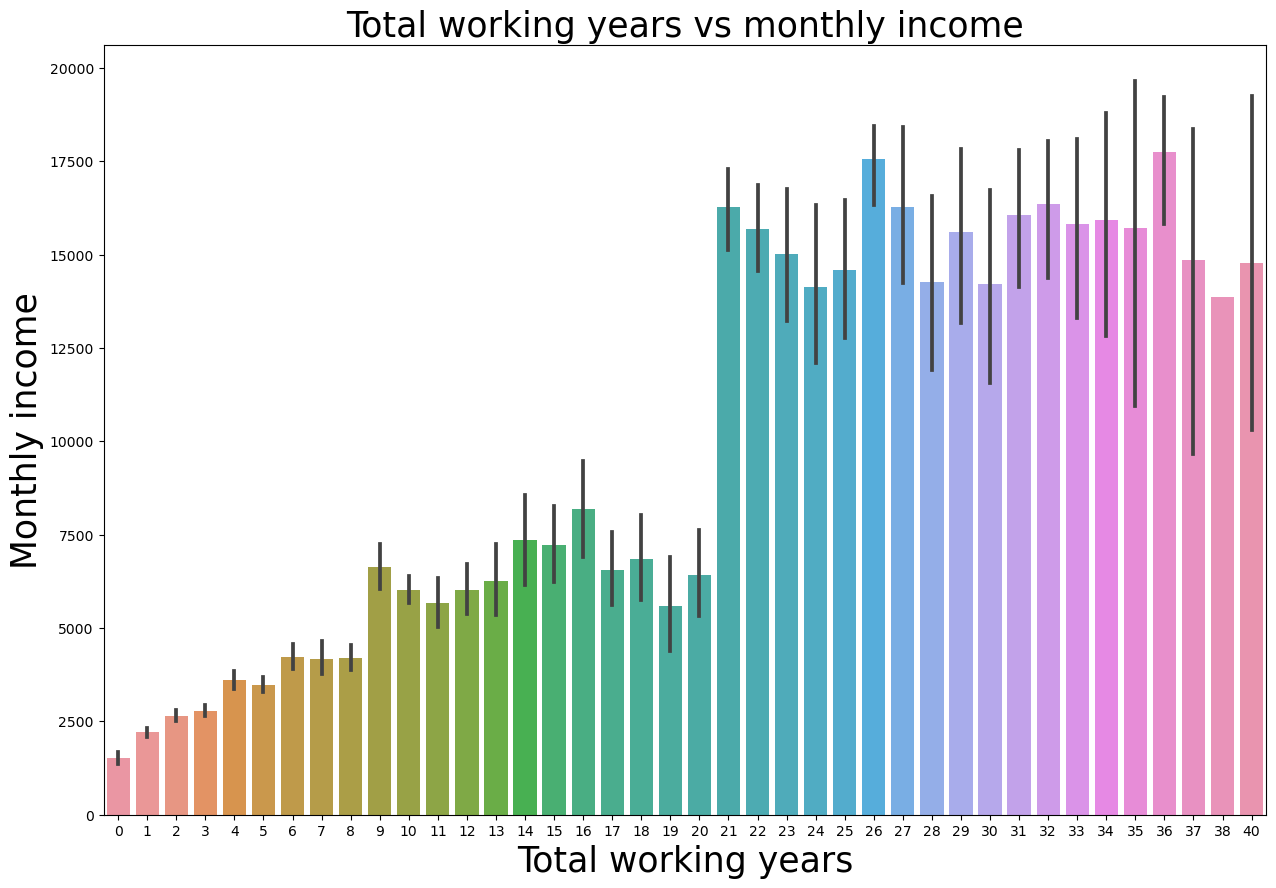

In [79]:
plt.figure(figsize = (15,10))
sns.barplot(df['TotalWorkingYears'],df['MonthlyIncome'])
plt.xlabel('Total working years', fontsize=25)
plt.ylabel('Monthly income', fontsize=25)
plt.title('Total working years vs monthly income', fontsize=25)
plt.show()

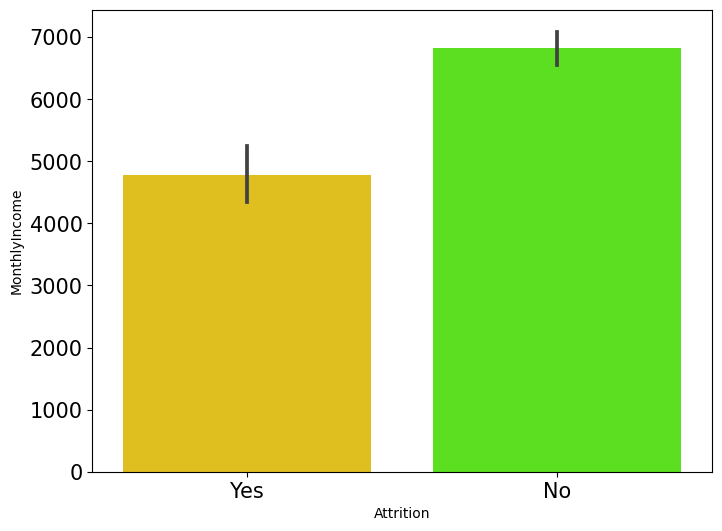

In [83]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition', y= 'MonthlyIncome', data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

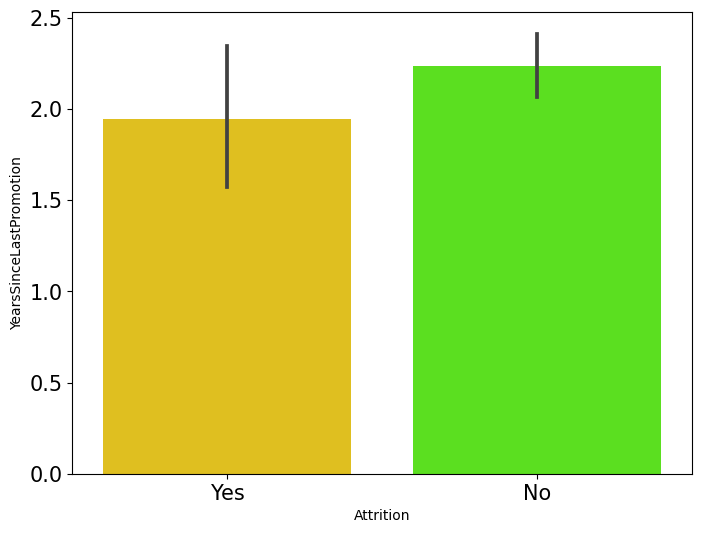

In [84]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition', y= 'YearsSinceLastPromotion', data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [85]:
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Encoding categorical data

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition']= le.fit_transform(df['Attrition'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [89]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1 , inplace=True)

In [90]:
df.shape

(1470, 31)

In [95]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def Ordinal_Encoder(df,column):
    df[column]= oe.fit_transform(df[column])
    return df 

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

df =Ordinal_Encoder(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


# 

# Outliers Detection and Removal

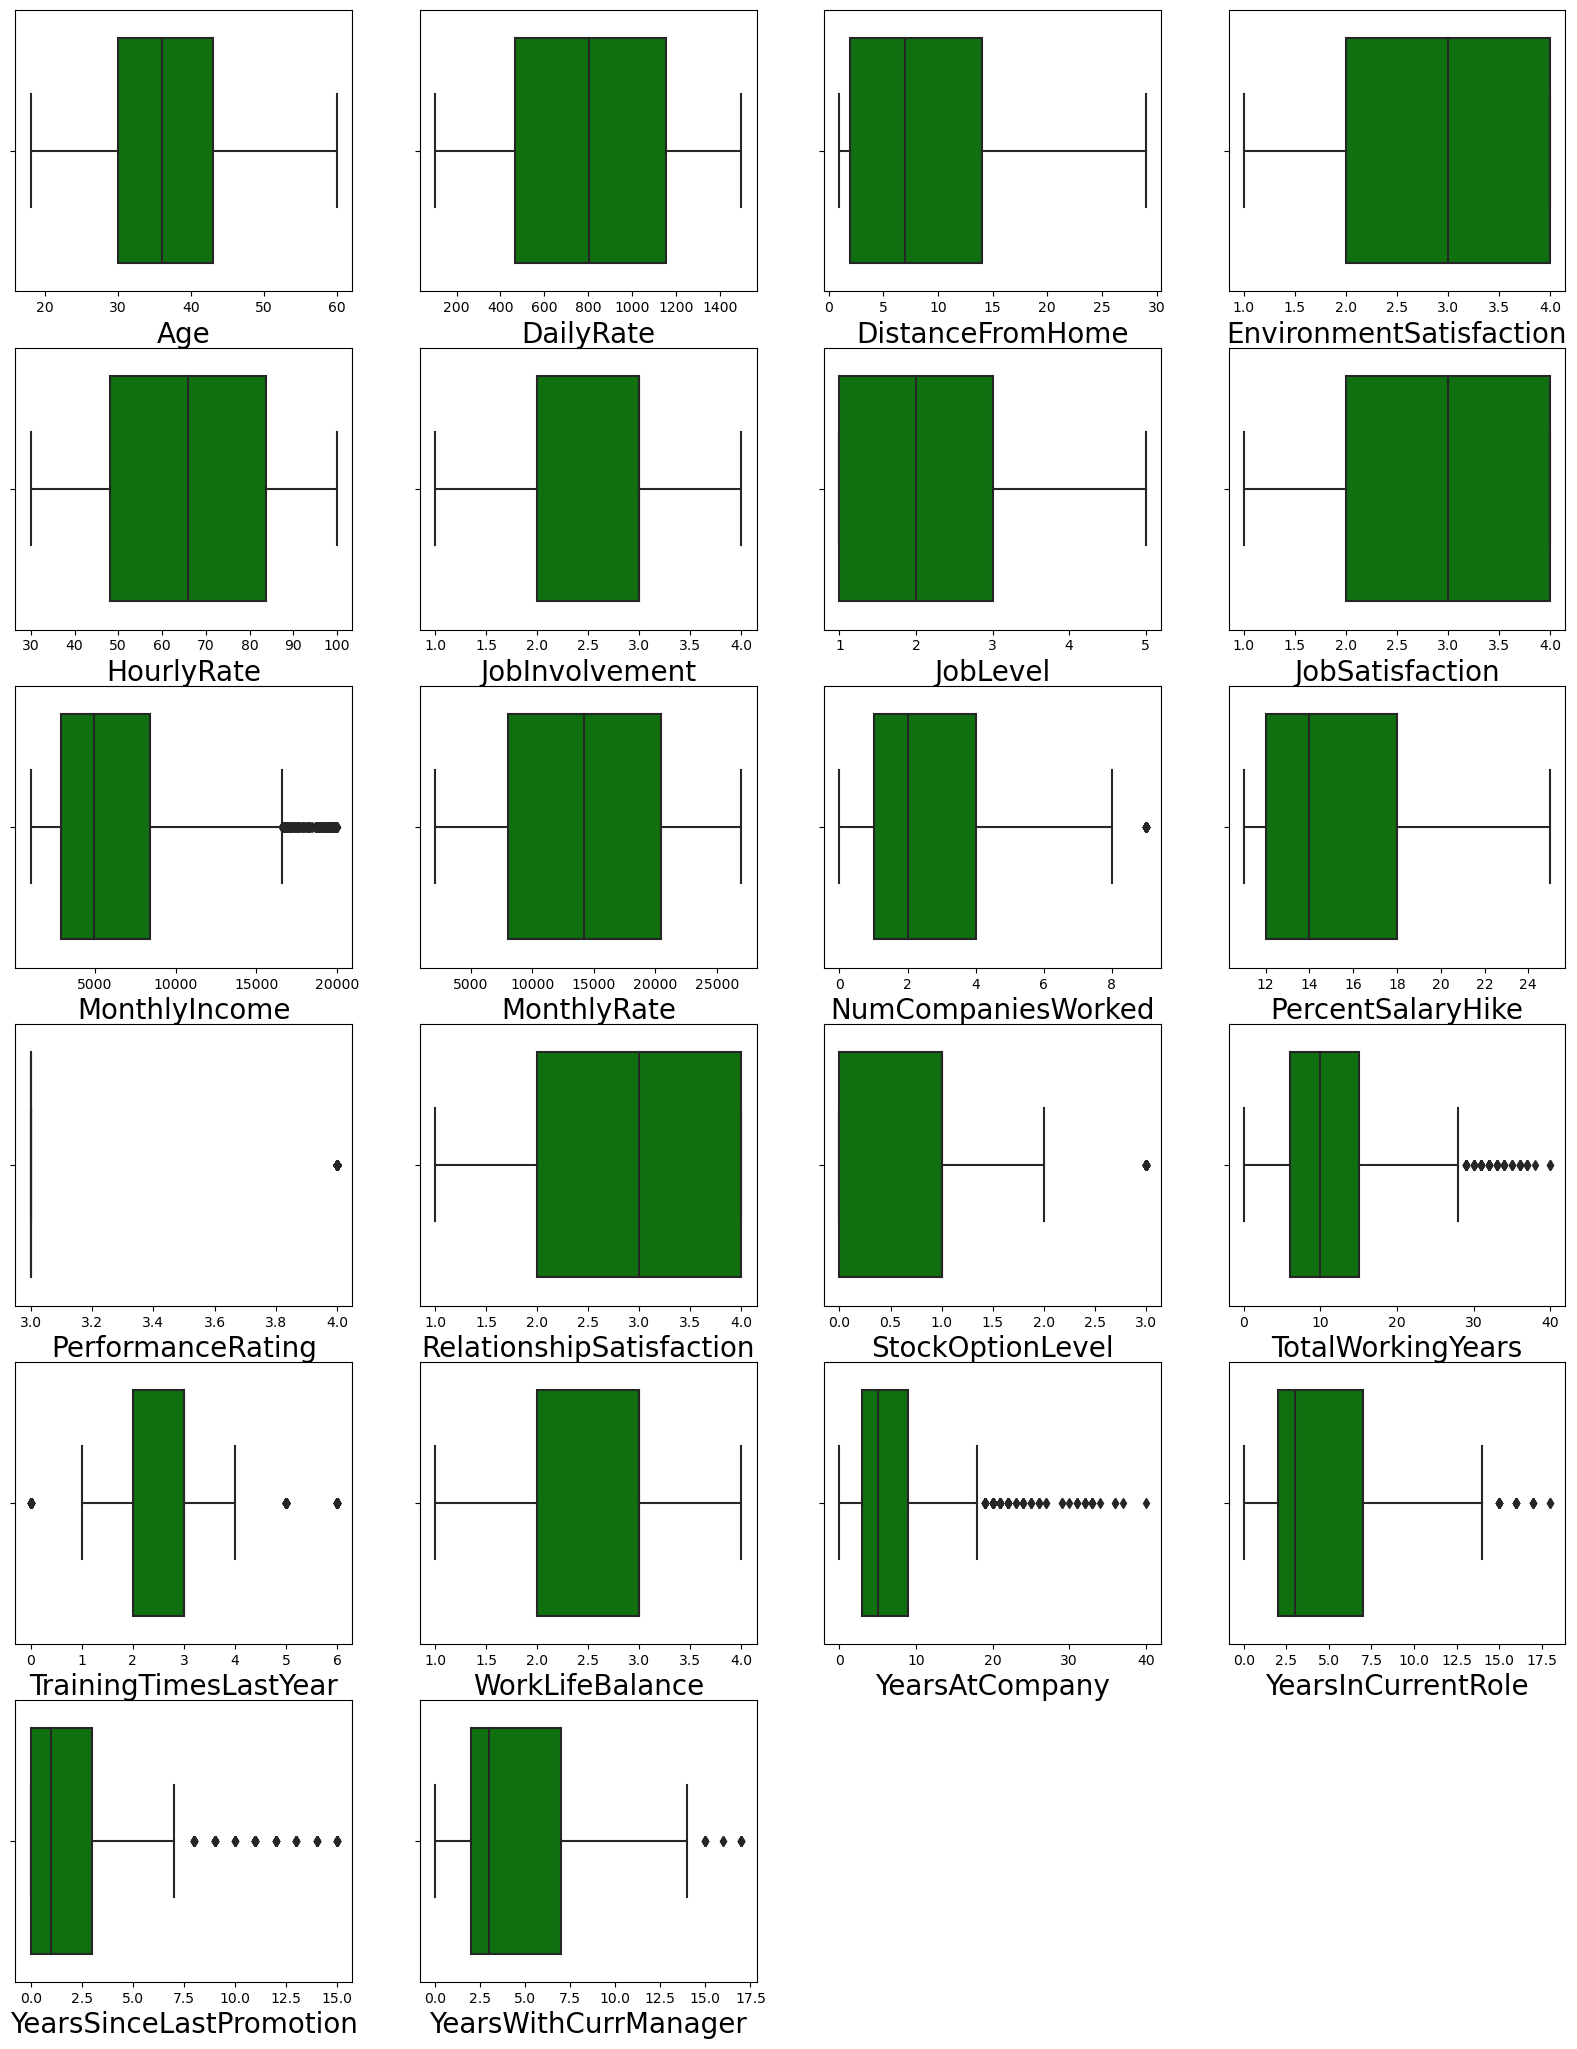

In [99]:
plt.figure(figsize= (20, 30), facecolor='white')
plotnumber =1 
for column in Numeric:
    if plotnumber <=28:
        ax= plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [102]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1= df[(z<3).all(axis = 1)]

print('Shape of the dataframe before removing outliers: ', df.shape)
print('Shape of the dataframe after removing outliers: ', df1.shape)
print('Percentage of data loss post outliers :', (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df = df1.copy()

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outliers : 5.646258503401361


### Data loss

In [103]:
print('\033[1m'+'Percentage data loss :'+'\033[0m', ((1470-1387)/1470)*100,'%')


Percentage data loss : 5.646258503401361 %


# Feature selection and Engineering

### 1. Skewness of features

In [104]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [105]:
#X= df.drop(['Attrition'], axis= 1)
#Y = df['Attrition']

### Transforming skew data using power_transform

In [110]:
from sklearn.preprocessing import power_transform
df = power_transform(X)
df = pd.DataFrame(df, columns= X.columns)
df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

### 2. Corrleation

In [111]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019607,0.019864,-0.036344,-0.025855,0.215520,-0.037564,0.013967,-0.037163,0.026203,...,NaN,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019607,1.000000,-0.001984,-0.003560,-0.007041,-0.006468,0.034658,0.004183,-0.011439,0.026364,...,NaN,-0.036165,-0.006092,0.027298,0.006192,-0.017977,-0.024021,-0.035610,-0.033148,-0.032665
DailyRate,0.019864,-0.001984,1.000000,-0.003546,-0.006034,-0.017504,0.040993,0.034324,-0.003271,0.015156,...,NaN,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036344,-0.003560,-0.003546,1.000000,0.037834,0.012780,0.082525,-0.013867,-0.030950,-0.000623,...,NaN,-0.037572,-0.000630,-0.006833,0.039938,0.017807,0.025457,0.057817,0.017699,0.024241
DistanceFromHome,-0.025855,-0.007041,-0.006034,0.037834,1.000000,0.002714,0.021074,-0.013409,0.010557,0.015607,...,NaN,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006468,-0.017504,0.012780,0.002714,1.000000,-0.038405,-0.026095,-0.017807,0.011105,...,NaN,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037564,0.034658,0.040993,0.082525,0.021074,-0.038405,1.000000,0.042609,0.005059,-0.004372,...,NaN,-0.018254,-0.012936,-0.001827,0.054321,0.034788,0.004483,0.004372,0.023062,0.028189
EnvironmentSatisfaction,0.013967,0.004183,0.034324,-0.013867,-0.013409,-0.026095,0.042609,1.000000,-0.014940,-0.042512,...,NaN,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.011439,-0.003271,-0.030950,0.010557,-0.017807,0.005059,-0.014940,1.000000,0.005618,...,NaN,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026364,0.015156,-0.000623,0.015607,0.011105,-0.004372,-0.042512,0.005618,1.000000,...,NaN,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


In [121]:
df.drop(['PerformanceRating'], axis = 1, inplace=True)

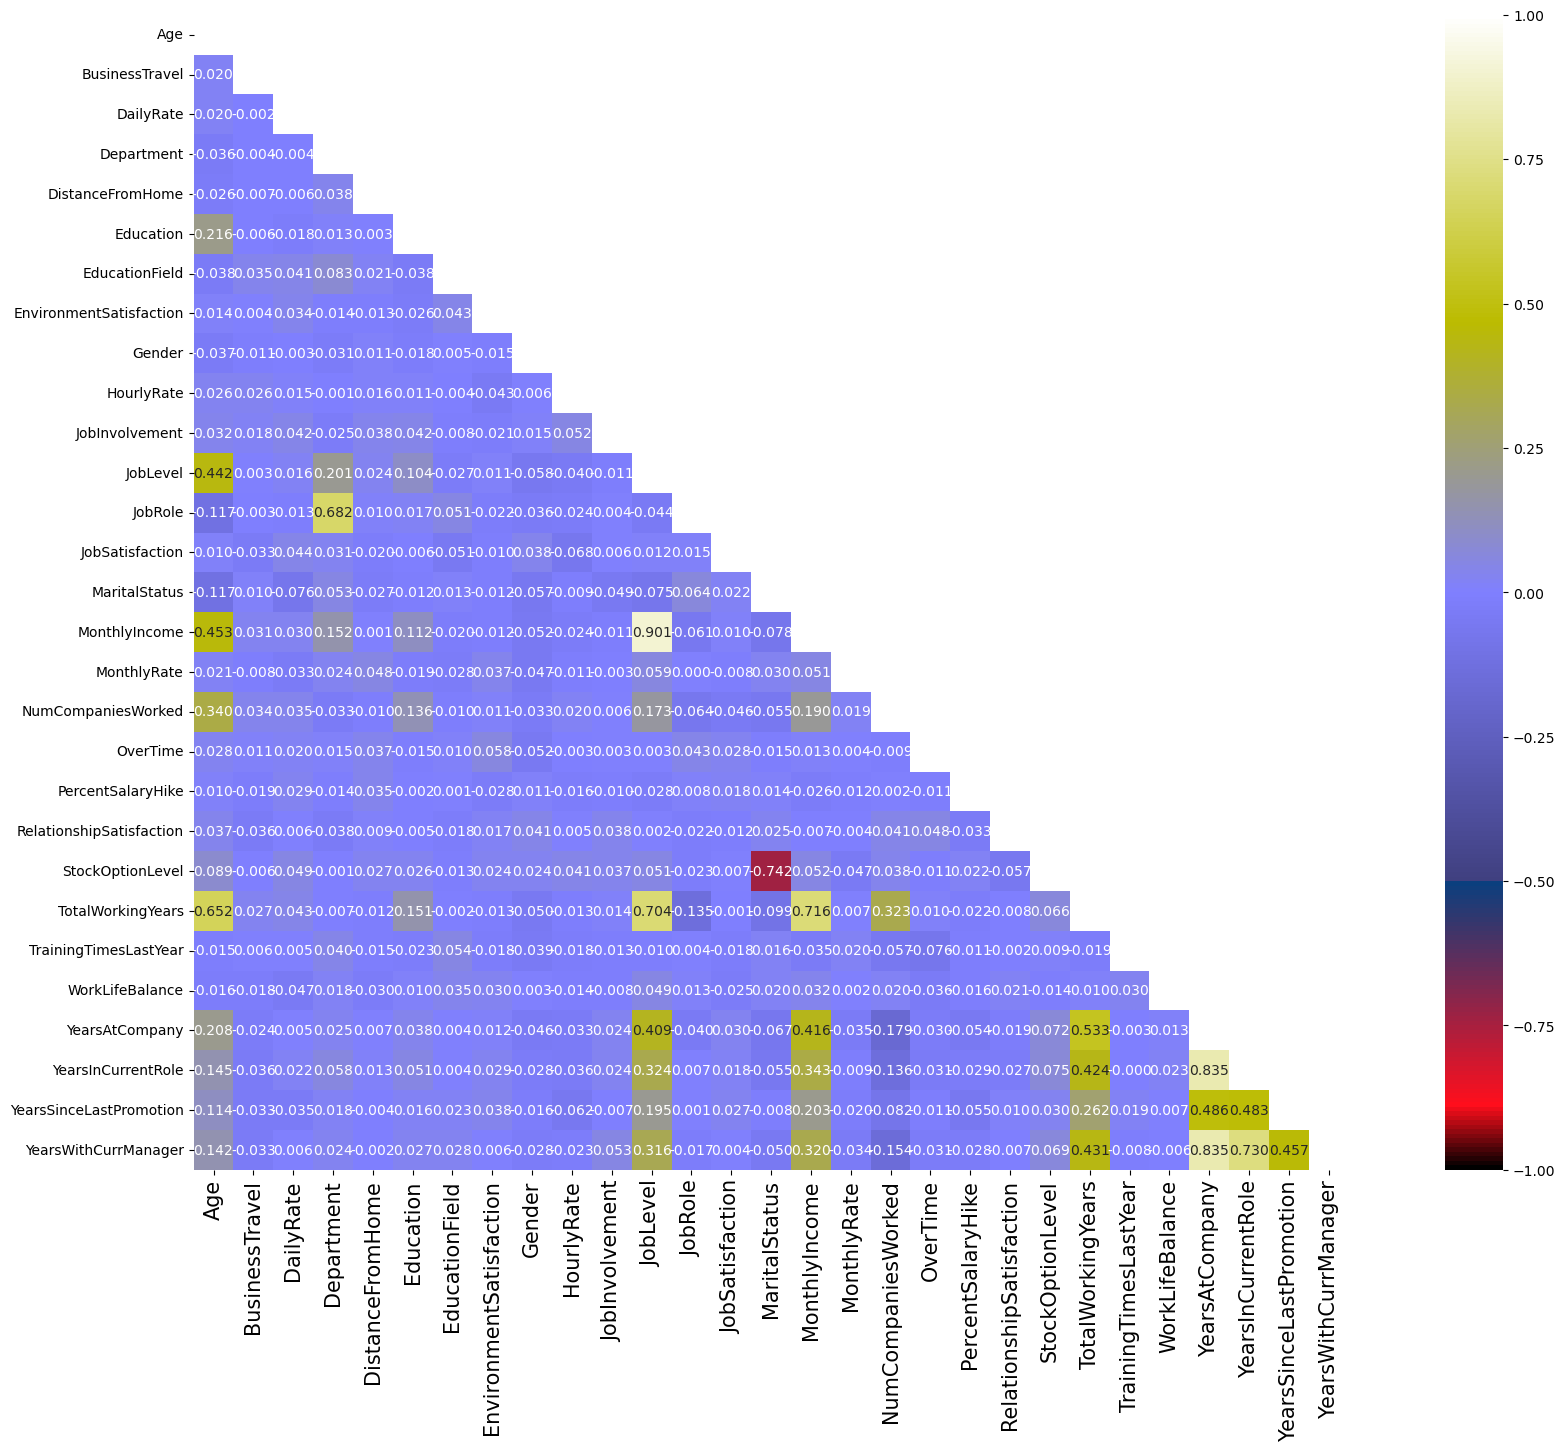

In [122]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10}, cmap='gist_stern',mask= upper_triangle)
plt.xticks(fontsize= 15)
plt.xticks(fontsize= 15)
plt.show()

In [129]:
plt.figure(figsize = (18,6))
df.corr()['Y'].drop(['Y']).plot(kind = 'bar', color='r')
plt.xlabel('Features', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.title('Correlation of features with Target Variable Average Price', fontsize=25)
plt.show()

KeyError: 'Y'

<Figure size 1800x600 with 0 Axes>

## Checking variance_inflation_factor

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range (df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,30.994586,Age
1,1.520532,Attrition
2,6.669133,BusinessTravel
3,5.041636,DailyRate
4,13.932479,Department
5,2.342119,DistanceFromHome
6,9.343006,Education
7,3.892970,EducationField
8,7.283358,EnvironmentSatisfaction
9,2.547848,Gender


# Standard Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

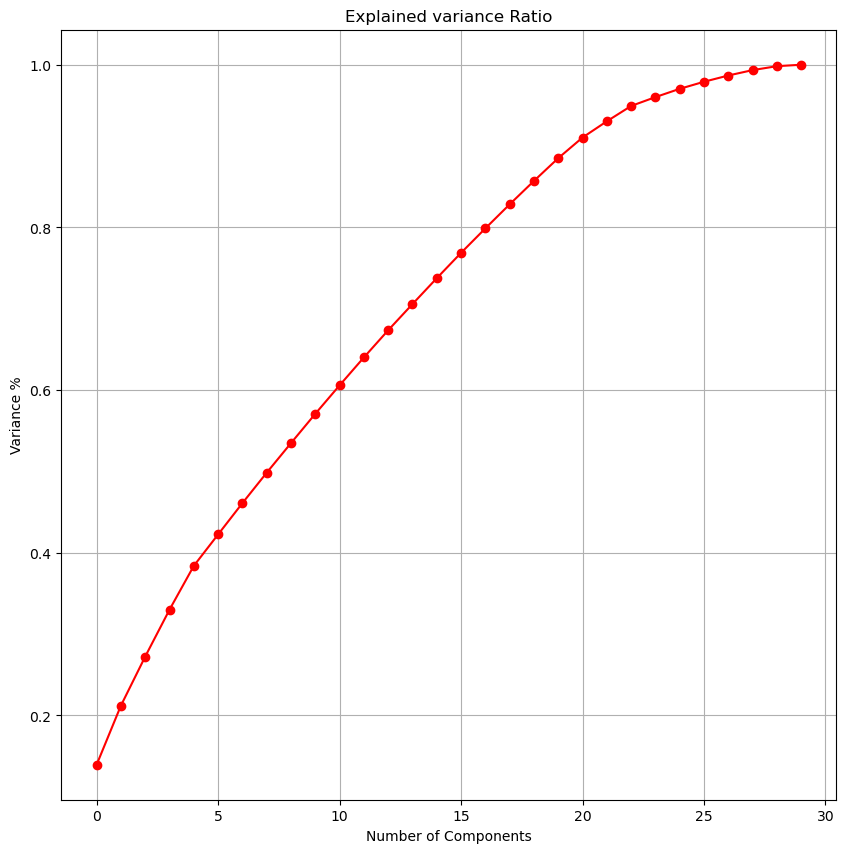

In [138]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scaler)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [139]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scaler)

In [140]:
principle_x=pd.DataFrame(x_new,columns= np.arange(21))

# Machine Learnings Model Building

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [142]:
x_train, x_test, y_train, y_test = train_test_split(principle_x, Y, random_state=42, test_size=0.3)
print('Training feature matrix size:', x_train.shape)
print('Training target vector size:', y_train.shape)
print('Test feature matrix size:', x_test.shape)
print('Test target vector size:', y_test.shape)

Training feature matrix size: (970, 21)
Training target vector size: (970,)
Test feature matrix size: (417, 21)
Test target vector size: (417,)


### Finding Best Random State

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train, x_test, y_train, y_test = train_test_split(principle_x, Y,test_size = 0.33, random_state=i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state', maxRS)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8908296943231441 on Random_state 109


In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8842794759825328


Confusion matrix of Logistics Regression : 
 [[375  15]
 [ 38  30]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       390
           1       0.67      0.44      0.53        68

    accuracy                           0.88       458
   macro avg       0.79      0.70      0.73       458
weighted avg       0.87      0.88      0.87       458



### Finding Optimal value N_neighbors for KNN 

In [161]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import neighbors
from math import sqrt 
from sklearn.metrics import mean_squared_error
rmse_val =[]
for K in range(30):
    K=K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    
    model.fit (X_train,Y_train)
    y_pred = model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k=', K, 'is:', error)

RMSE value for k= 1 is: 0.42570260443598507
RMSE value for k= 2 is: 0.37088351965656063
RMSE value for k= 3 is: 0.3824764170599109
RMSE value for k= 4 is: 0.3796113848311847
RMSE value for k= 5 is: 0.3796113848311847
RMSE value for k= 6 is: 0.3796113848311847
RMSE value for k= 7 is: 0.3738154508127982
RMSE value for k= 8 is: 0.3824764170599109
RMSE value for k= 9 is: 0.3824764170599109
RMSE value for k= 10 is: 0.3824764170599109
RMSE value for k= 11 is: 0.3767245643436497
RMSE value for k= 12 is: 0.3796113848311847
RMSE value for k= 13 is: 0.3796113848311847
RMSE value for k= 14 is: 0.3767245643436497
RMSE value for k= 15 is: 0.3767245643436497
RMSE value for k= 16 is: 0.3824764170599109
RMSE value for k= 17 is: 0.3738154508127982
RMSE value for k= 18 is: 0.3796113848311847
RMSE value for k= 19 is: 0.3796113848311847
RMSE value for k= 20 is: 0.38532014704726253
RMSE value for k= 21 is: 0.3824764170599109
RMSE value for k= 22 is: 0.3824764170599109
RMSE value for k= 23 is: 0.38247641705

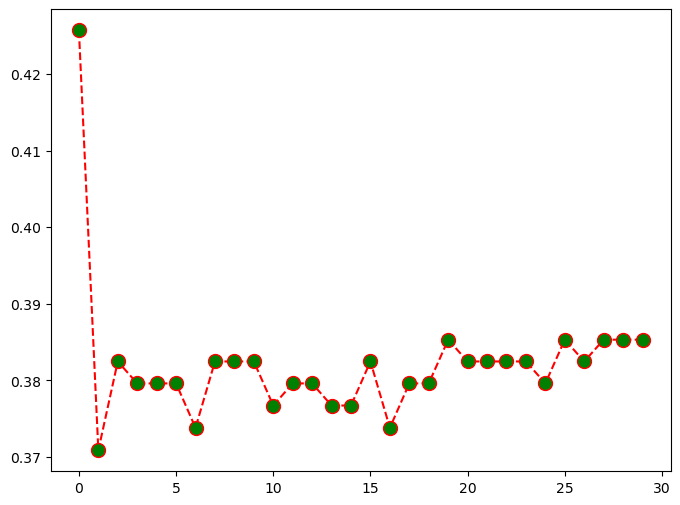

In [163]:
plt.figure(figsize=(8,6))
plt.plot(range(30), rmse_val, color='r', linestyle= 'dashed', marker='o', markerfacecolor='g', markersize=10)

## Appling other classification algorithm

In [183]:
model= [SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]
for m in model:
    m.fit(X_train, Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is'+'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score of Logistics Regression : 0.8864628820960698


Confusion matrix of Logistics Regression : 
 [[386   4]
 [ 48  20]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       390
           1       0.83      0.29      0.43        68

    accuracy                           0.89       458
   macro avg       0.86      0.64      0.69       458
weighted avg       0.88      0.89      0.86       458



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score of Logistics Regression : 0.8908296943231441


Confusion matrix of Logistics Regression : 
 [[384   6]
 [ 44  24]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       390
           1       0.80      0.35      0.49        68

    accuracy              

# CrossValidation:

In [184]:
from sklearn.model_selection import cross_val_score
model= [LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]
for m in model:
    m.fit(X_train, Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is'+'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score of Logistics Regression : 0.8842794759825328


Confusion matrix of Logistics Regression : 
 [[375  15]
 [ 38  30]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       390
           1       0.67      0.44      0.53        68

    accuracy                           0.88       458
   macro avg       0.79      0.70      0.73       458
weighted avg       0.87      0.88      0.87       458



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score of Logistics Regression : 0.8864628820960698


Confusion matrix of Logistics Regression : 
 [[386   4]
 [ 48  20]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       390
           1       0.83      0.29      0.43        68

    accuracy      

## Hyper Parameter Tunning: GridSearchCV

In [189]:
from sklearn.model_selection import GridSearchCV

In [190]:
parameter = {'bootstrap':[True], 'max_depth':([5,10,20,40,50, None]),
              'max_features': ['auto', 'log2'],
             'criterion':['gini','entrophy'],
             'n_estimators': [5,10,20,40,50,100]}

In [191]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entrophy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 20, 40, 50, 100]},
             verbose=3)

In [193]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 10}

# Final Model

In [194]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8668122270742358


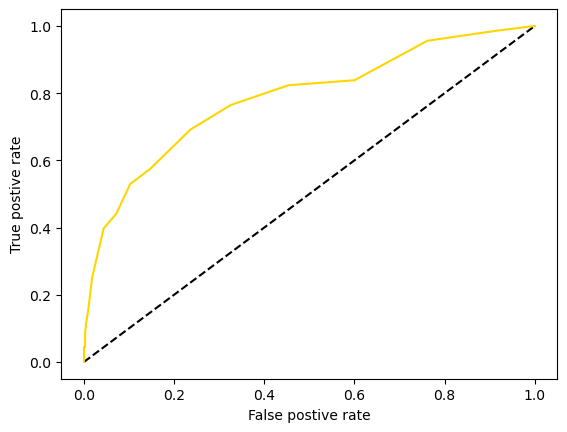

Auc Score :
 0.5757541478129714


In [195]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving Model

In [196]:
import joblib
joblib.dump(Final_mod,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']